First, we begin by taking in the dataset and cleaning it up for text mining and sentiment analysis. We will also create a new csv file with the clean data.

In [1]:
# Dataset source: https://jmcauley.ucsd.edu/data/amazon/
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

'''
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
vote - helpful votes of the review
style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)
image - images that users post after they have received the product
'''

df = pd.read_json('Movies_and_TV_5.json', lines=True)
df = df.drop(columns=['verified','reviewTime','reviewerID','asin','vote','unixReviewTime','image','asin','reviewerName'])

df = df[df['reviewText'].str.split().str.len().gt(5)] # Reviews must have greater than 5 words to perform sentiment analysis

# Convert reviews to all lowercase
def to_lower(text):
    return text.lower()
df.reviewText = df.reviewText.apply(to_lower)

# Remove special characters from reviews
def remove_special_char(text):
    newString = ''
    for i in text:
        if i.isalnum():                     # If character is alphanumeric, keep. Else, add a space
            newString = newString + i
        else:
            newString = newString + ' '
    return newString

df.reviewText = df.reviewText.apply(remove_special_char)

# Remove stopwords: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]
df.reviewText = df.reviewText.apply(rem_stopwords)
df.to_csv("clean_data.csv")
df
# Use overall to classify as positive or negative: 3+ is positive, 1 and 2 are negative
# reviewText is full review, will use for sentiment analysis
# Summary might be useful for EDA? Length of summary with score maybe?
# Style also for EDA

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,overall,style,reviewText,summary
0,5,{'Format:': ' VHS Tape'},"[sorry, purchase, years, ago, first, came, goo...",Amazing!
1,5,{'Format:': ' VHS Tape'},"[believe, tell, receive, blessing, watching, v...",Great Gospel VHS of the Cathedrals!
2,5,{'Format:': ' DVD'},"[seen, x, live, many, times, early, days, rece...",A great document of a great band
3,5,{'Format:': ' DVD'},"[excited, finally, live, concert, video, x, se...",YES!! X LIVE!!
4,5,{'Format:': ' DVD'},"[x, one, best, punk, bands, ever, even, like, ...",X have still got it
...,...,...,...,...
3011,5,{'Format:': ' Blu-ray'},"[takes, husband, back, times, rode, bikes, ear...",GREAT FOR THE OLD SCHOOL RIDER
3012,5,{'Format:': ' DVD'},"[great, movie, true, classic, watch, good, sou...",Five Stars
3013,5,{'Format:': ' Amazon Video'},"[every, movie, buff, needs, belt]",A classic.
3015,5,{'Format:': ' Amazon Video'},"[great, movie, whole, family, watch, funny, sa...",great movie.


Now, we will perform EDA to better understand our data and find interesting information about our dataset.

<Axes: >

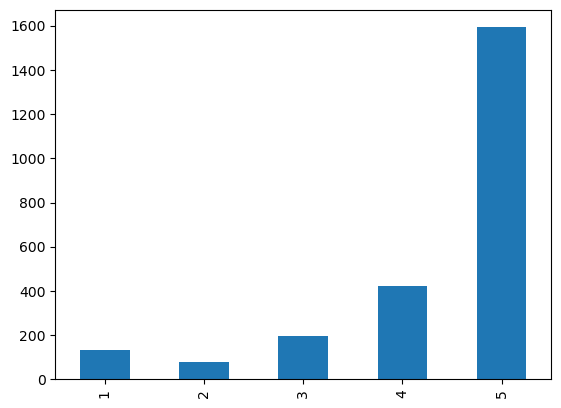

In [7]:
pdf = df['overall'].value_counts()
pdf = pdf.reindex(sorted(pdf.index), axis = 1)
pdf.plot.bar()

AttributeError: 'list' object has no attribute 'value_counts'